In [1]:
#Importing the necessary libraries
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

#Importing the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
#Building the convnet model to classify MNIST images
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [3]:
#Summarizing the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [4]:
#Splitting the data into training and testing datasets, then normalizing the datasets by reshaping and dividing by 255
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
#Compiling the model with the RMSprop optimizer, categorical_crossentropy loss function, and accuracy as the metric
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [6]:
#Fitting the model to the training images and labels with 5 epochs and a batch size of 64
history = model.fit(train_images, train_labels, epochs = 5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 30s 30ms/step - loss: 0.3937 - accuracy: 0.8730
Epoch 2/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0474 - accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0302 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0224 - accuracy: 0.9936
Epoch 5/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0194 - accuracy: 0.9935


In [13]:
#Viewing the accuracy of the model
print('Accuracy: {} percent'.format(history.history['accuracy'][4]*100))

Accuracy: 99.38833117485046 percent


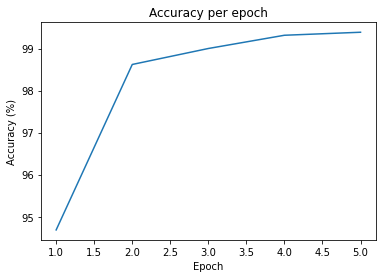

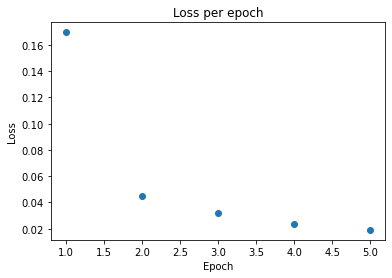

In [18]:
#Plotting the accuracy and loss per epoch

import matplotlib.pyplot as plt

plt.plot([x + 1 for x in range(len(history.history['accuracy']))], [x * 100 for x in history.history['accuracy']])
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per epoch')
plt.show()

plt.scatter([x + 1 for x in range(len(history.history['loss']))], history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per epoch')
plt.show()

In [19]:
#Generating the prediction for the testing dataset and printing the predictions
predictions = model.predict(test_images)

In [21]:
print('Predictions:', predictions)

Predictions: [[5.13564817e-14 3.71616848e-10 8.00337752e-09 ... 9.99999881e-01
  1.89958986e-11 9.34555757e-08]
 [4.78654755e-11 4.43890542e-08 1.00000000e+00 ... 2.22779069e-11
  1.33453127e-11 1.72583426e-17]
 [4.08008766e-11 9.99999881e-01 6.02375150e-10 ... 1.42520264e-07
  4.85280739e-11 1.33164715e-08]
 ...
 [4.85542526e-16 2.13219359e-10 1.43987047e-12 ... 1.22036437e-09
  1.49380186e-09 9.31416277e-09]
 [7.65686536e-08 3.62796338e-12 2.52655400e-13 ... 8.96523342e-11
  6.93170150e-05 3.63041042e-10]
 [7.28246334e-08 1.40141274e-10 2.58933142e-09 ... 1.32522472e-14
  3.97070127e-10 6.11834671e-12]]
